# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [8]:
# General tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

# Classification
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Data Exploration & Visualization

In [9]:
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(9557, 143)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [10]:
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

## **Categories of variables**

- **Target** (income response variable)
- Identifiers
- Family
- Age
- Sex
- Education
- Marriage Status
- Disability
- Region
- Property Information (rent/rooms/size/occupants/own-or-rent)
- Appliances/Utilites
- Electronics
- Property Build
- Intersection Groups
- Squares

## Explanatory Variables
  
(Details are in **variable_descriptions.ipynb**)

## Response Variable (Target)
### Income Level 
(1 = extreme poverty, 4 = non-vulnerable)

Text(0.5, 1.0, 'Poverty Level Counts')

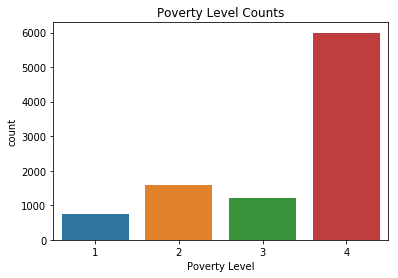

In [11]:
countByTarget = df.groupby(df.Target).count().Id

sns.countplot(df.Target)
plt.xlabel("Poverty Level")
plt.title("Poverty Level Counts")

## Property Information

### Number of Households

In [12]:
df.groupby(df.idhogar).count().shape[0]

2988

### Heads of Households

In [13]:
df.parentesco1.sum()

2973

### Monthly Rent

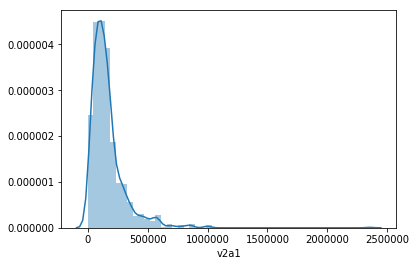

In [14]:
# Proportion of NaN values
df.v2a1.isna().sum() / len(df.v2a1)

sns.distplot(df.v2a1.dropna())

# Cleaning

## Missing Values

In [15]:
# 5 columns with NaN values
cols_nan = list(df.columns[df.isna().any()])
cols_nan

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [16]:
# Total number of missing values
df[cols_nan].isna().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [17]:
# Proportion of missing values
df[cols_nan].isna().sum() / df.shape[0]

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

## Approach

Three features have very large number of missing values (72-83%).

### **v2a1** (*monthly rent payment*)  

It seems that for every household with missing values, all individuals have no rent value.  What about creating a household dataframe and filling those values based on our selected classification? The field will be dropped and revisited once a model is selected.

In [18]:
# See if any members of household have rental value if there is a NaN for rent in household
any_nan = df.groupby('idhogar')['v2a1'].apply(lambda x: np.isnan(x).any()).mean() 
all_nan = df.groupby('idhogar')['v2a1'].apply(lambda x: np.isnan(x).all()).mean()
any_nan - all_nan

0.0

In [19]:
df.drop('v2a1', axis=1, inplace=True)

### **v18q1** (*number of tablets in household*)  

Again, households with missing values contained missing values for all individuals, so we will set those to 0.

In [20]:
any_nan = df.groupby('idhogar')['v18q'].apply(lambda x: np.isnan(x).any()).mean() 
all_nan = df.groupby('idhogar')['v18q'].apply(lambda x: np.isnan(x).all()).mean()
any_nan - all_nan

0.0

In [21]:
df.v18q1.fillna(0, inplace=True)
df.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### **rez_esc** (*years behind in school*)  

Without domain knowledge in how to replace this data, field is dropped.

In [22]:
df.drop("rez_esc", axis=1, inplace=True)

### **meaneduc** (*avg years education for adults (18+)*)

Will take mean of mean education level for adults in household and apply to these individuals.  

In [23]:
educ_by_household = df[df.age >= 18].groupby('idhogar')['escolari'].mean()

def missing_educ(x, SQ=False):
    
    if SQ == False:
        col = 'meaneduc'
    else:
        col = 'SQBmeaned'
        
    # Find missing value ids
    missing_ids = x[x[col].isna()][col].keys()
    
    # Iterate over missing values and set them to correct value
    for i in missing_ids:
        if SQ == False:
            household = x.loc[i, 'idhogar']
            x.loc[i, col] = educ_by_household[household]
        else:
            avg = x.loc[i, 'meaneduc']
            x.loc[i, col] = avg ** 2
            
    return x
        
df = missing_educ(df)
df.meaneduc.isna().sum()

0

### **SQBmeaned** (*meaneduc squared*)

Will square value found from **meaneduc**

In [24]:
df = missing_educ(df, SQ=True)
df.SQBmeaned.isna().sum()

0

### Result

In [25]:
# Total number of missing values
df.isna().sum().sum()

0

## Miscellaneous

### edjefe / edjefa / dependency

These columns have the following potential values:  
- *yes*
- *no*
- *float*
  
These variables will be dropped until we understanding how the variables are setup (not clear from the kaggle competition).

### Squared Values

Here we setup our dataframe to either include only non-squared features, only squared features, or both.

(*this is only in the case of the features starting with "SQB"*)

In [26]:
print("Columns before:", df.shape[1])
df = df.drop(columns=['edjefe', 'edjefa', 'dependency'])
print("Columns after:", df.shape[1])

Columns before: 141
Columns after: 138


In [27]:
col_names = list(df.columns.values)
squared_cols = []

# Get only columns starting with "SQB"
for col in col_names:
    if "SQB" in col:
        squared_cols.append(col)
squared_cols

['SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned']

In [28]:
non_squared_cols = []

# Get col names of SQB non-squared counterparts
for col in squared_cols:
    if col == "SQBmeaned":
        non_squared_cols.append(col[3:] + "uc")
    else:
        non_squared_cols.append(col[3:])
non_squared_cols

['escolari',
 'age',
 'hogar_total',
 'edjefe',
 'hogar_nin',
 'overcrowding',
 'dependency',
 'meaneduc']

In [29]:
# Drop squared features
# df = df.drop(columns=squared_cols)

# Drop non-squared counterparts
# df = df.drop(columns=non_squared_cols)

# Drop both
# df = df.drop(columns=squared_cols + non_squared_cols)

In [30]:
df.shape

(9557, 138)

# Classification (Initial)

In [31]:
# Partition explanatory and response variables
X = df.drop(columns=['Target', 'Id', 'idhogar']) # Dropping identifiers and target
print(X.shape)

y = df['Target']
print(y.shape)

(9557, 135)
(9557,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [25]:
clf_linear = LinearRegression()

In [26]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.49476987447698745

In [28]:
f1_linear = f1_score(y_test, y_pred, average='macro')
f1_linear

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28386560965239604

## Multiclass Logistic

In [29]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [30]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [31]:
clf_multiclass_logistic.score(X_test, y_test)

0.5230125523012552

In [32]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic

0.3871799012694391

## SVM

In [33]:
clf_SVM = SVC()

In [34]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
clf_SVM.score(X_test, y_test)

0.6260460251046025

In [36]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM

0.22173155053186192

## Random Forests

In [37]:
clf_RF = RandomForestClassifier()

In [38]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
clf_RF.score(X_test, y_test)

0.8885983263598326

In [40]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF = f1_score(y_test, y_pred_RF, average='macro')
f1_RF

0.8329671725074821

In [41]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQBmeaned,0.055512
meaneduc,0.046022
SQBdependency,0.042049
overcrowding,0.028127
hogar_nin,0.026424
qmobilephone,0.025572
SQBedjefe,0.025558
SQBovercrowding,0.024795
rooms,0.021544
age,0.021212


## XGB Classifier

In [42]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [43]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.251929	validation_1-merror:0.268828
[1]	validation_0-merror:0.238195	validation_1-merror:0.258891
[2]	validation_0-merror:0.233224	validation_1-merror:0.256276
[3]	validation_0-merror:0.228515	validation_1-merror:0.245816
[4]	validation_0-merror:0.228646	validation_1-merror:0.251046
[5]	validation_0-merror:0.223283	validation_1-merror:0.250523
[6]	validation_0-merror:0.218967	validation_1-merror:0.250523
[7]	validation_0-merror:0.219097	validation_1-merror:0.246862
[8]	validation_0-merror:0.213996	validation_1-merror:0.243724
[9]	validation_0-merror:0.212819	validation_1-merror:0.239017
[10]	validation_0-merror:0.212034	validation_1-merror:0.241632
[11]	validation_0-merror:0.210464	validation_1-merror:0.238494
[12]	validation_0-merror:0.206148	validation_1-merror:0.232741
[13]	validation_0-merror:0.205363	validation_1-merror:0.230649
[14]	validation_0-merror:0.203401	validation_1-merror:0.228033
[15]	validation_0-merror:0.201177	validation_1-merror:0.224372
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [44]:
clf_xgb.score(X_test, y_test)

0.8603556485355649

In [45]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb

0.7887912428409045

### Feature Importance (XGBoost)

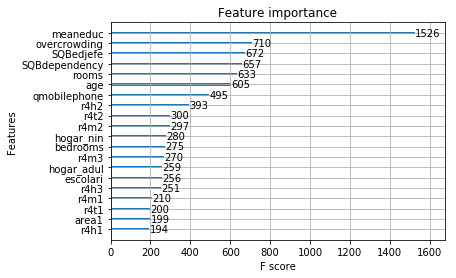

In [46]:
xgb.plot_importance(clf_xgb, max_num_features=20)

# Feature Engineering

## Rent Prediction

With our top performing classifiers (Random Forrest, and XGBoost) and several linear models (Linear Regression, RidgeCV, LassoCV, ElasticNetCV), we will attempt to predict values for rent, and in turn, use the modified dataframe to build a model for poverty level prediction.

### DataFrame Setup

In [34]:
# Setting up new dataframe
df_rent = pd.read_csv("train.csv")

In [35]:
# Handling missing values
df_rent.v18q1.fillna(0, inplace=True)
df_rent.drop("rez_esc", axis=1, inplace=True)
df_rent = missing_educ(df_rent)
df_rent = missing_educ(df_rent, SQ=True)

# Handling ambiguous columns
df_rent = df_rent.drop(columns=['edjefe', 'edjefa', 'dependency'])

print("Missing values of explanatory variables:", df_rent.drop(columns='v2a1').isna().sum().sum())
print("Missing values of target variable (rent):", df_rent.v2a1.isna().sum())

Missing values of explanatory variables: 0
Missing values of target variable (rent): 6860


In [36]:
# Remove missing values for target (rent)
df_rent_predict = df_rent.dropna()
print(df_rent_predict.shape)

(2697, 139)


### Classification Setup

In [37]:
# Partition explanatory and response variables
X = df_rent_predict.drop(columns=['v2a1', 'Id', 'idhogar']) # Dropping identifiers and target
print(X.shape)

y = df_rent_predict['v2a1']
print(y.shape)

(2697, 136)
(2697,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

### Classifiers

#### Linear Regression

In [39]:
clf_linear = LinearRegression()

In [40]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
clf_linear.score(X_test, y_test)

0.41565239021506595

#### RidgeCV

In [55]:
clf_ridge = RidgeCV(cv=10)

In [56]:
clf_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [57]:
clf_ridge.score(X_test, y_test)

0.4170109055740403

#### LassoCV

In [58]:
clf_lasso = LassoCV(cv=10)

In [59]:
clf_lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [60]:
clf_lasso.score(X_test, y_test)

0.32857340480019426

#### ElasticNetCV

In [61]:
clf_elastic = ElasticNetCV(cv=10)

In [62]:
clf_elastic.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [63]:
clf_elastic.score(X_test, y_test)

0.23290058488528995

#### Random Forrest

In [64]:
clf_RF = RandomForestRegressor()

In [65]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
clf_RF.score(X_test, y_test)

0.8663052214268894

#### XGBoost

In [67]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [68]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [69]:
clf_xgb.score(X_test, y_test)

0.85

### Rent Prediction Results

XGBoost gave the greatest accuracy in predicting rent values, so we will use it to fill missing rent values and apply our classifications again.

In [42]:
# Prepare data to fill in predicted values for rent
df_rent_nan = df_rent[df_rent.v2a1.isna()]

In [71]:
rent_pred = clf_xgb.predict(df_rent_nan.drop(columns=['v2a1', 'Id', 'idhogar']))

In [72]:
df_rent_nan['v2a1'] = pd.DataFrame(rent_pred).values

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_rent[df_rent.v2a1.isna()] = df_rent_nan

df_rent.isna().sum().sum()

0

# Classification with Predicted Rent Values

In [52]:
# Partition explanatory and response variables
X = df_rent.drop(columns=['Target', 'Id', 'idhogar']) # Dropping identifiers and target
print(X.shape)

y = df_rent['Target']
print(y.shape)

(9557, 136)
(9557,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [76]:
clf_linear = LinearRegression()

In [77]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.4952928870292887

In [79]:
f1_linear_rent = f1_score(y_test, y_pred, average='macro')
f1_linear_rent

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28552747900196884

## Multiclass Logistic

In [80]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [81]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [82]:
clf_multiclass_logistic.score(X_test, y_test)

0.5057531380753139

In [83]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic_rent = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic_rent

0.3354626622214823

## SVM

In [84]:
clf_SVM = SVC()

In [85]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
clf_SVM.score(X_test, y_test)

0.6302301255230126

In [87]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM_rent = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM_rent

0.2066695713089907

## Random Forests

In [54]:
clf_RF = RandomForestClassifier()

In [55]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [46]:
clf_RF.score(X_test, y_test)

0.9018518518518519

In [47]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF_rent = f1_score(y_test, y_pred_RF, average='macro')
f1_RF_rent

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.8318160527857599

In [51]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
meaneduc,0.040701
SQBmeaned,0.037632
SQBedjefe,0.037518
rooms,0.027421
qmobilephone,0.025599
SQBovercrowding,0.025439
overcrowding,0.024621
r4t2,0.023068
r4h3,0.023015
r4t1,0.020742


## XGB Classifier

In [93]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [94]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.254284	validation_1-merror:0.27772
[1]	validation_0-merror:0.241857	validation_1-merror:0.265167
[2]	validation_0-merror:0.235971	validation_1-merror:0.257845
[3]	validation_0-merror:0.228385	validation_1-merror:0.251046
[4]	validation_0-merror:0.225899	validation_1-merror:0.247385
[5]	validation_0-merror:0.221975	validation_1-merror:0.245293
[6]	validation_0-merror:0.220798	validation_1-merror:0.243724
[7]	validation_0-merror:0.215566	validation_1-merror:0.239017
[8]	validation_0-merror:0.214258	validation_1-merror:0.23954
[9]	validation_0-merror:0.212165	validation_1-merror:0.239017
[10]	validation_0-merror:0.210595	validation_1-merror:0.237971
[11]	validation_0-merror:0.209156	validation_1-merror:0.233264
[12]	validation_0-merror:0.20811	validation_1-merror:0.235356
[13]	validation_0-merror:0.203401	validation_1-merror:0.231695
[14]	validation_0-merror:0.202878	validation_1-merror:0.232218
[15]	validation_0-merror:0.199608	validation_1-merror:0.226987
[16]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [95]:
clf_xgb.score(X_test, y_test)

0.8561715481171548

In [96]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb_rent = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb_rent

0.7752747119102226

### Feature Importance (XGBoost)

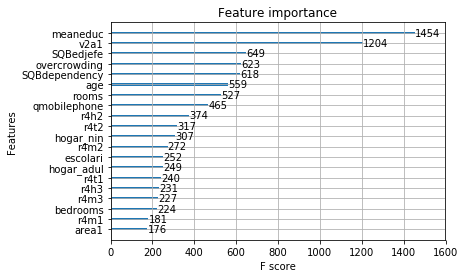

In [97]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models

In [98]:
print("Change in f1 with predicted rent values:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_rent - f1_linear, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_rent - f1_logistic, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_rent - f1_SVM, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_rent - f1_RF, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_rent - f1_xgb, 5))

Change in f1 with predicted rent values:

Linear Regression:	  0.00166
Logistic Regression:	 -0.05172
Support Vector Machines: -0.01506
Random Forrest:		  0.01215
XGBoost:		 -0.01352


# Feature Transformation

Using the top 8 most important features, we will determine which combination of their squares and logs result in the best scores.

In [5]:
top_features = ['meaneduc', 'v2a1', 'SQBedjefe', 'overcrowding', 'SQBdependency', 'age', 'rooms', 'qmobilephone']
top_features_SQ = ["SQ_" + i for i in top_features]
top_features_LOG = ["LOG_" + i for i in top_features]

top_features + top_features_SQ + top_features_LOG

['meaneduc',
 'v2a1',
 'SQBedjefe',
 'overcrowding',
 'SQBdependency',
 'age',
 'rooms',
 'qmobilephone',
 'SQ_meaneduc',
 'SQ_v2a1',
 'SQ_SQBedjefe',
 'SQ_overcrowding',
 'SQ_SQBdependency',
 'SQ_age',
 'SQ_rooms',
 'SQ_qmobilephone',
 'LOG_meaneduc',
 'LOG_v2a1',
 'LOG_SQBedjefe',
 'LOG_overcrowding',
 'LOG_SQBdependency',
 'LOG_age',
 'LOG_rooms',
 'LOG_qmobilephone']

### Feature Selection Map

ID | Original | Squares | Logs
--- | --- | --- | --- 
1 | X | - | -
2 | - | X | -
3 | - | - | X
4 | X | X | -
5 | X | - | X
6 | - | X | X